# Introduction to Scikit-Learn Workshop 14th August 2019

![title](images/pydata_cardiff.jpg)

## Outline and Main Aims

This workshop will provide a basic introduction to using the API in the [scikit-learn](https://scikit-learn.org/stable/) Python machine learning library. The following topics will be demonstrated:

* How the API is used to fit a model - and predict outputs from new data points
* The difference between regression and classification problems
* How to visualise the model outputs
* Examples of using metrics to assess model performance
* Methods for post-hoc examination of features in the model

For the visualisations and post-hoc analysis, examples will be shown using additional machine learning libraries.

### Expectation Management

Machine learning is a __massive__ topic! This cannot be stressed enough! There is still active research development into various aspects in the field, and this will most likely continue in the coming decades. This workshop is intended to provide an introduction to new users, as well as a quick whirlwind tour into some additional techniques and libraries that you can use alongside scikit-learn.

The important thing to remember is that machine-learning, together with other methods (or definitions) of Artificial Intelligence and more traditional statistical learning methods, is a lot more involved that just installing a library and hitting 'GO'. All of these techniques are meant to work alongside background research, and domain expertise in any particular field.

Here is a brief list of topics that cannot be convered today:

* Detailed description of feature engineering
    * Some basic examples will be given - but this is, in itself, a massive area of ongoing study
* An in depth explanation of the mathematics behind the algorithms
    * Some basic intuition is given, but this material is aimed at a practical level
    * It is important to realise the strengths, weaknesses, and assumptions about any technique used
    * The [scikit-learn user-guide](https://scikit-learn.org/stable/user_guide.html) documentation pages are a fantastic source of information
* Domain specific interpretation of models (very important disclaimer):
    * Different fields require different outcomes of models:
        * Internet advertising - get the message out to as many as you can afford and use the model to pick the best subset. The _confetti_ approach
        * Clinical trials and drug research - you need to be far more certain of any outcome


## Machine Learning terminology and aims

* The main aim of machine learning is to gain information from data that we have, and use it to _infer_ information about new data points that we will receive:
* __Supervised Learning__
    * We know the target values of the data that we already have
        * __Regression__
            * Our target values can take a range (usually continuous) of values
        * __Classification__
            * Our target values can take a finite number of discrete values
            * Examples include binary: yes/no, countries in GB: Scotland/Wales/England etc
* __Unsupervised Learning__
    * We don't have labels in our existing dataset
    * We want to find patterns in this data
    * Clustering
    * This topic was dealt with in the previous workshop
    
__This workshop will focus on supervised learning, and primarily on classification__

* __Samples__:
    * Each data point that we have - represented as the ___rows___ in an input matrix or dataframe
* __Features__:
    * The number of points of information that we have about each datapoint - represented as the ___columns___
* __Classes__:
    * The number of discrete target values in classification tasks

In [1]:
# Getting a wider notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### Getting the basic imports - others will be added when introduced

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import matplotlib
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

## Compulsory _Linear Regression_ example

$y = m \cdot x + c$

While this might seem a bit overkill to use machine learning in this circumstance, when more basic statistical approaches will suffice, it is a good first example to show how the models can recover any parameters that we _know_ to be correct - because we have made them!

#### Data Creation

Here, we will make some artificial data where the data points broadly fit along a line on a 2D graph, made from the following:

* The __slope__ of the line _m_
* The __intercept__ - the point at which the line crosses the y-axis _c_
* Some added Gaussian noise (normally distributed)

In [4]:
np.random.seed(22)
noise = np.random.randn(200) * 2

intercept = -1.7
slope = 3.4

x_lin_reg = np.linspace(-2, 10, 200)
y_lin_reg = intercept + slope * x_lin_reg + noise

#### Data and Targets

This has provided us with our input data, and desired outputs. This task is an example of a __supervised__ learning algorithm, whereby the model is given information about the intended outcome of every data point. Its aim is to learn the relationship, so that other data points, that do not have labels, can be assessed after the model is trained.

The aim is to __use the x values to predict the y values__ - in other words, we want to recover the intercept and slope, as we can then use that to create any y value from and x value

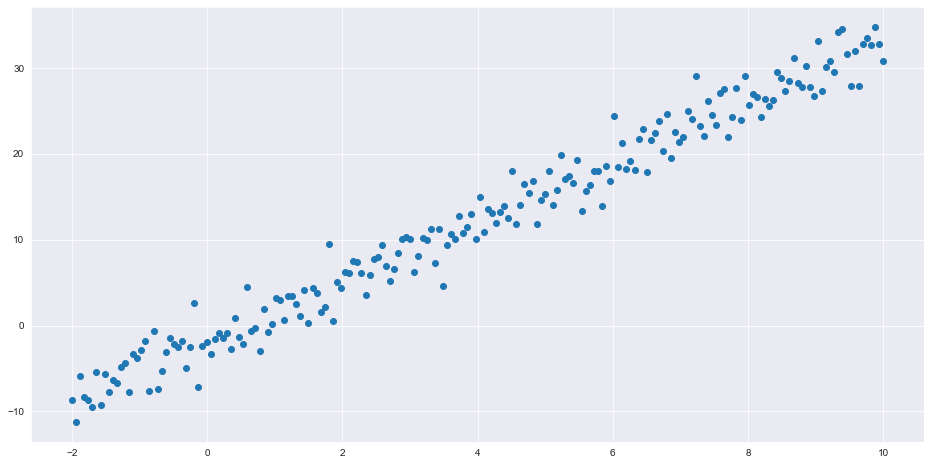

In [5]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_lin_reg, y_lin_reg);

## Importing the model type

Here we use the `LinearRegression` model from the `linear_model` module. scikit-learn relies heavily on the concept of _object oriented programming_. The model that we import is a `class` or `object` that allows a range of functional procedures to be carried out on some data.

When we use this model object, we create an __instance__ of the object, and when creating this instance, we can provide some instructions on how it should behave.

Each model has specific instructions and functionality, and all of these can be seen in the documentation.

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# LinearRegression?

In this instance we want the intercept - this can be specified explictly, but it is the default

In [8]:
linear_model = LinearRegression()

# The following is exactly the same!
# linear_model = LinearRegression(fit_intercept=True)

## Note that the inputs to the model _must_ be a 2D array

Although this might seem strange for a single feature input - it in nevertheless necessary.

There are 2 main ways to do this in `numpy`:

* Using `reshape` - this reshapes the array as (`n_rows`, `n_columns`) - the -1 is telling `numpy` - 'use as many as you need'
* The `newaxis` method using a slicing operation

Note that this notebook will use capitals for variables that are in 2D

In [9]:
X_lin_reg = x_lin_reg.reshape(-1, 1)
X_lin_reg = x_lin_reg[:, np.newaxis]

Note that the rows are the datapoints/samples, and there is only one column as it is a single feature

In [10]:
X_lin_reg[:10, :]

array([[-2.        ],
       [-1.93969849],
       [-1.87939698],
       [-1.81909548],
       [-1.75879397],
       [-1.69849246],
       [-1.63819095],
       [-1.57788945],
       [-1.51758794],
       [-1.45728643]])

## The `fit` and `predict` pattern

If you're going to remember one thing from this workshop - remember these 2 functions that are called in scikit-learn to build the models, and then use them to make new predictions of unseen data.

In [11]:
linear_model.fit(X_lin_reg, y_lin_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Viewing recovered parameters

In [12]:
linear_model.intercept_

-1.838289283733161

In [13]:
linear_model.coef_

array([3.49015194])

## Viewing model output

Note that the output now contains the signal without the noise - that's ultimately what we want!

In [14]:
y_pred_lin_reg = linear_model.predict(X_lin_reg)

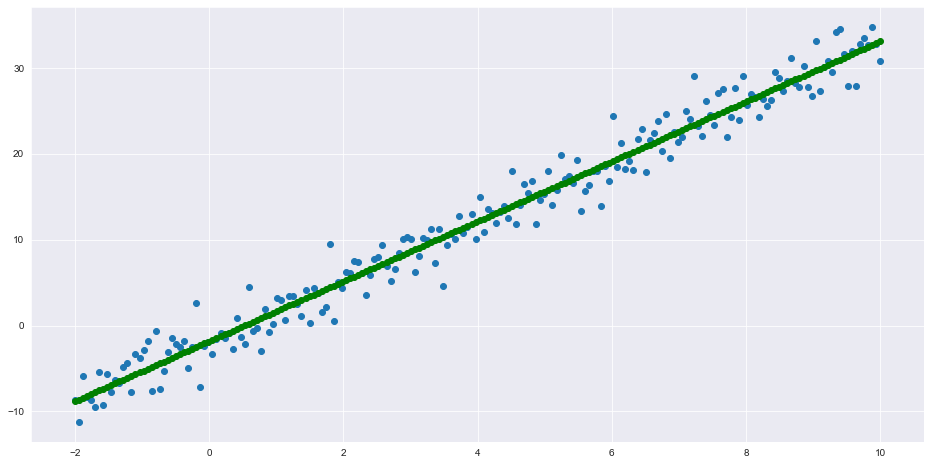

In [15]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_lin_reg, y_lin_reg)
ax.scatter(x_lin_reg, y_pred_lin_reg, c='g');

# Classification problems

The previous model was used to fit a _regression_ problem, whereby the target variable contains a large range of values - it is _continuous_ in nature. However, in many cases, we want to predict classification - or membership of a particular group.

The first example with be that of _binary_ classification - either 0 or 1. We'll make some random data. If x > 3, then y = 1, otherwise y = 0. But there will be a slight overlap in the data.

## Important:

The values of classification targets in scikit-learn must be numeric values in an array! So a list of strings with category names is not suitable! This workshop will not deal with feature engineering. That is for another workshop! (Of note - the problem mentioned here can be solved using the `LabelEncoder` function)

In [16]:
np.random.seed(12)

x_cat = np.random.uniform(low=-2, high=8, size=500)
y_cat = np.where(x_cat > 3, 1, 0)
x_cat[y_cat == 1] -= 0.5

In [17]:
y_cat

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,

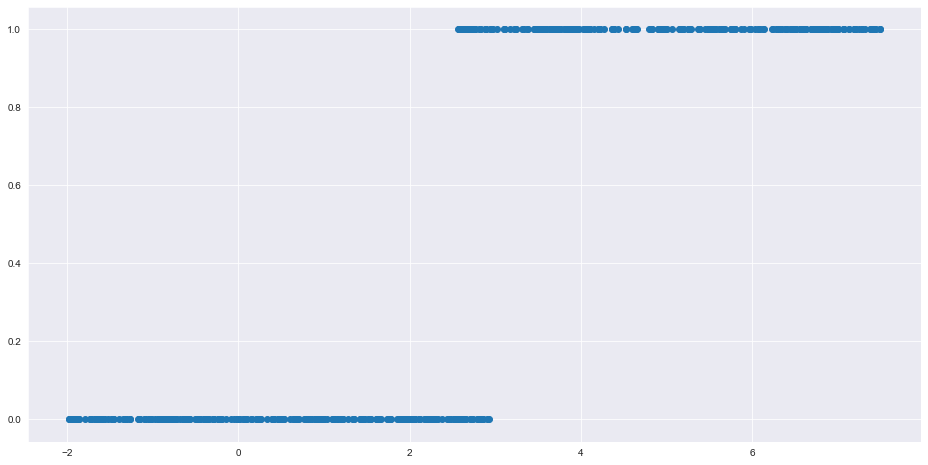

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_cat, y_cat);

## Trying out Linear Regression

Remember to add the dimension!

In [19]:
X_cat = x_cat.reshape(-1, 1)

In [20]:
linear_model.fit(X_cat, y_cat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_cat_pred = linear_model.predict(X_cat)

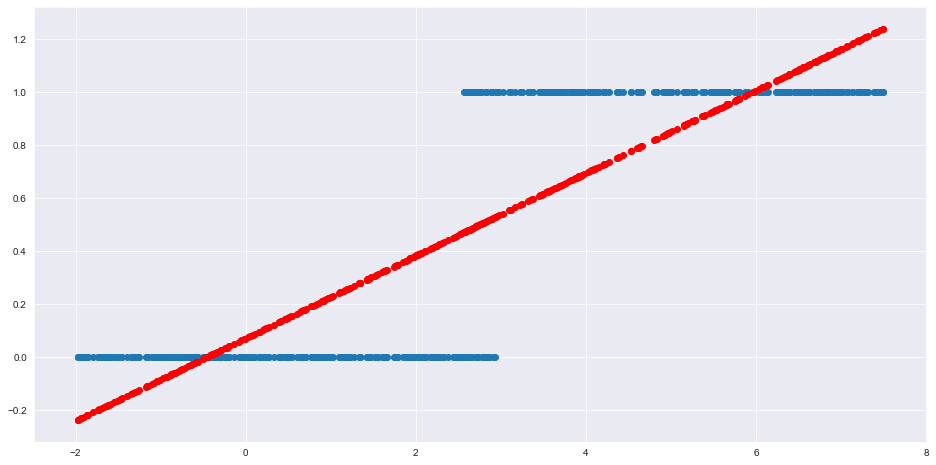

In [22]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_cat, y_cat)
ax.scatter(x_cat, y_cat_pred, c='r');

# Getting a better model

The most basic model for use here is called a __Logistic Regression__. But why is it called regression??? This can be very confusing! It is actually because the same mathematic methods are use to fit to a line, but the data is transformed using the function below - this can then be used for classification

### Logistic Regression function

$\frac{1}{1 + e^{-x}}$

But remember this (as it confused me when I was starting out): __Logistic Regression is used for CLASSIFICATION!!!__

We'll now visualise how this function looks

In [23]:
def sigmoid(ar):
    return 1 / (1 + np.exp(-ar))

In [24]:
x_sig = np.linspace(-5, 8, 200)
y_sig = sigmoid(x_sig)

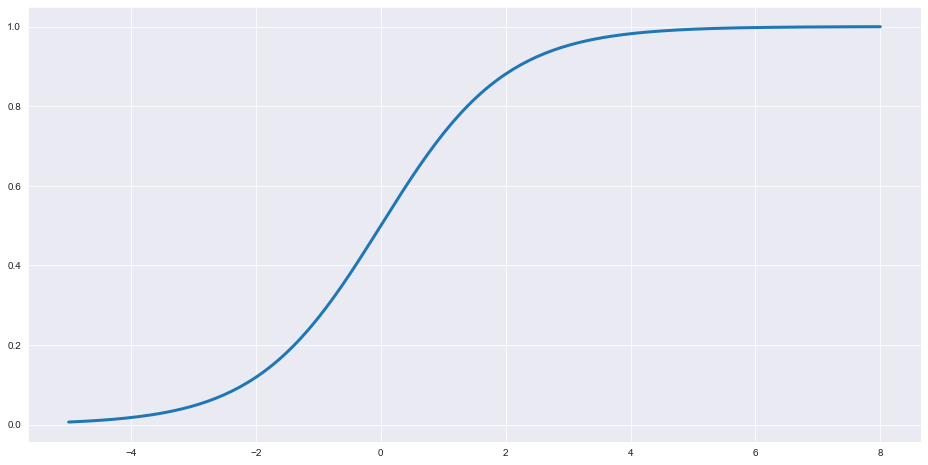

In [25]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x_sig, y_sig, linewidth=3);

### How this works for classification

We still can map x to y - but now, if y is > 0.5 we classify it as 1, and 0 otherwise

# Importing and using the model

Note that the `solver` is being specified here. This has been obtained by looking at the documentation and seeing that it is best for small problems.

As mentioned in the introduction cells, we won't go into the maths behind this here. But importantly: __don't worry__ - just read through the documentation and don't get bewildered with this!

The scikit-learn developers have done a fantastic job of making their software usable.

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg = LogisticRegression(solver='liblinear')

In [28]:
log_reg.fit(X_cat, y_cat)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_cat_pred = log_reg.predict(X_cat)

## Plotting the results

The graph below shows the fitted logistic curves, together with the predictions. As expected, there are some misclassifications where the datapoints overlap

In [30]:
from scipy.special import expit

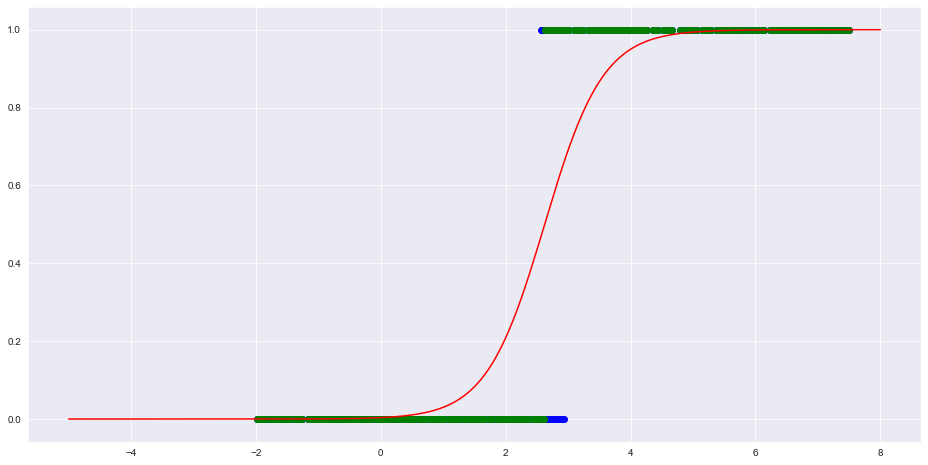

In [31]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_cat, y_cat, c='b');
ax.scatter(x_cat, y_cat_pred, c='g')
ax.plot(x_sig, expit(x_sig * log_reg.coef_[0] + log_reg.intercept_), c='r');

# Getting probability outputs

We can also get an idea of certainty that a model has in our data

* __Darker Red__: More certain
* __Darker Blue__: Less certain

In [32]:
y_cat_proba = log_reg.predict_proba(X_cat)

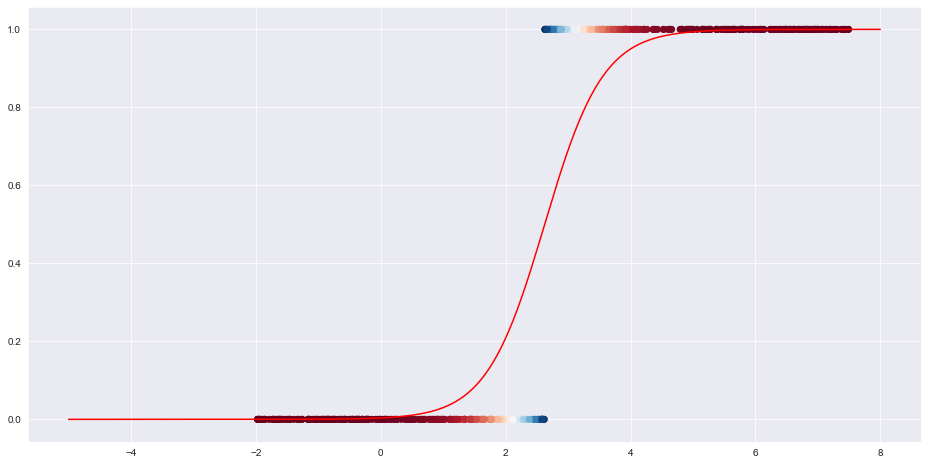

In [33]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_cat, y_cat_pred, c=y_cat_proba.max(axis=1), cmap='RdBu_r')
ax.plot(x_sig, expit(x_sig * log_reg.coef_[0] + log_reg.intercept_), c='r');

# Performance metrics

Like many of the other procedures introduced in this workshop - this is a very wide area, and we can only touch on a couple of areas. 

Methods introduced here:

* The confusion matrix:
    * This is a quick and simple method to examine correct and incorrect classifications
    * The idea situation is to have as many as possible on the top-left to bottom-right diagonal
* The 'Receiver-Operator-Characteristic Area-Under-the-Curve' ROC-AUC score
    * A more complex score for binary classification problems
    * Looks at the trade off between true and false positive as the threshold is changed
    * Introduced here as it is often used - and is not immediately intuitive
    
## Testing on unseen data

Whenever assessing the performance of any model - it is important to use datapoints that were not used to train the model. This will be described in greater detail later on, but for now, we will use the `train_test_split` function from the `model_selection` module to split our data, and set aside 10% of the data for getting the metrics only.

Also note that this method does a ___stratified___ split. This means that the ratio of classes will remain the same. So, if there is only 20% of positive cases in a dataset, then both the training and test sets will contain 20% of their respective sets as positive classes. In other words - there won't be any chance of either the training or the tests sets taking all the information!

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [35]:
# train_test_split?

In [36]:
np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size=0.2)

In [37]:
X_train.shape

(400, 1)

In [38]:
X_test.shape

(100, 1)

In [39]:
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

Here we can see that there are 3 incorrect classifications in the test set

In [40]:
confusion_matrix(y_test, y_pred)

array([[53,  3],
       [ 0, 44]], dtype=int64)

## Using the visualisation library YellowBrick

The [YellowBrick](https://www.scikit-yb.org/en/latest/index.html) library includes an array of visualisation methods to aid with machine learning interpretation

At first the confusion matrix is used as before, except the output is clearer and more informative than the plain text output from sklearn.

Note that the visualiser is now used to fit and score the model - and note the use of the magical `poof` to get the image. Very _Wizard of Oz!

In [41]:
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

In [42]:
cm = ConfusionMatrix(LogisticRegression(solver='liblinear'))

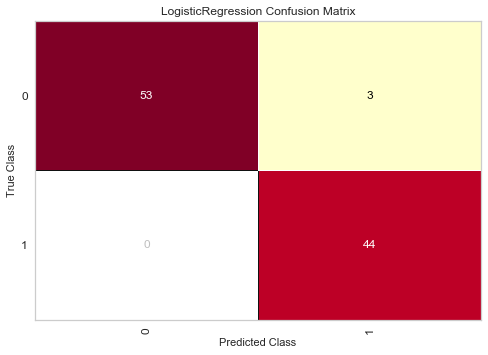

In [43]:
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

Resetting some plotting colour settings that got affected by the YellowBrick import

In [44]:
sns.set_style('darkgrid')
sns.set_palette('tab10')
cmap = matplotlib.cm.get_cmap('tab10')

# The Area Under the Curve (AUC) metric

This metric is being covered here, as it is often used in cases of binary classification. One of the reasons why it is so popular is in cases where the classification is 'unbalanced'. This means that you can have many more of one class than another.

## Examples in psychiatric medicine

A commonly shared statistic of 'lifetime-risk' of schizophrenia is 1%. This means that it is easy to create a 'schizophrenia-predicting' model that is always 99% accurate: just always predict that someone will never suffer from the disease! Simples!

However, it is clear that this model is useless, and the use of the AUC metric can help with this.

## How it works

We've mentioned before that the threshold appears when the y-value reaches 0.5 - but this can be altered. Imagine that we set it much lower, then gradually in the positive direction - from left to right on the sigmoid graph, each time classifying more of the data points as positive (1) values. At the start, we only scoop up the true positives, but as we get to the ambiguous area, we start to pick up some false positives well.

In the AUC graph, we map out this progress. The area of this graph is 1 by 1 - given an area also of 1. We start off in the bottom left of the graph. For every correct classification that we scoop up, we draw a bit upwards - but as we get any wrong ones - we move to the right. Eventually - all of them will be classed as positive, so we reach the top right. The aim is to move up as much as possible before we head right. We then take the 'area under this curve'.

If the data is completely random - or our model is useless, we will collect true and false positives at random, and the line will head in a diagonal manner. This would give us an area of 0.5. But if the data is all classified perfectly, we will collect all of the correct answers before we start getting any mistakes, meaning that we will hit the top left corner, and the area will be 1.

__The AUC metric therefore goes from worst to best with values of 0.5 to 1__

## Starting with our existing 'clear' dataset

In [45]:
rocauc1 = ROCAUC(LogisticRegression(solver='liblinear'), micro=False, macro=False, per_class=True)

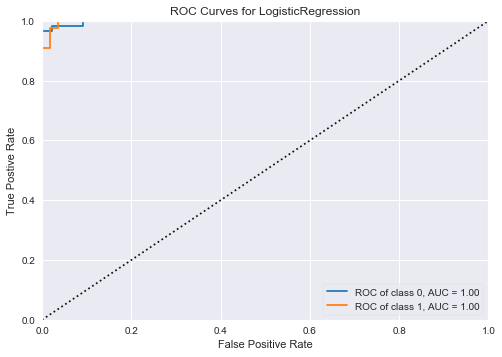

In [46]:
rocauc1.fit(X_train, y_train)
rocauc1.score(X_test, y_test)
g = rocauc1.poof()

## Making some more obsure data

We'll now tweak the dataset so that it there will a considerable overlap, and it is not as easy to clarify. In the beginning, we'll fit the model to the whole data, so that we can get an idea of the shape of the logistic curve that is fitted.

### Note that we are using the same `log_reg` object. We don't need to make a new one each time.

In [47]:
x_cat2 = deepcopy(x_cat)

In [48]:
x_cat2[y_cat==1] -= 2
X_cat2 = x_cat2.reshape(-1, 1)

In [49]:
log_reg.fit(X_cat2, y_cat)
sig_fitted2 = expit(x_sig * log_reg.coef_[0] + log_reg.intercept_)

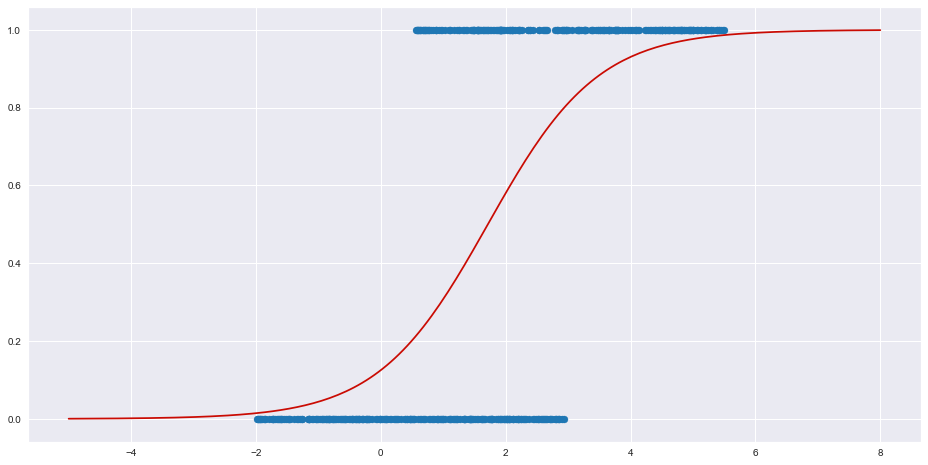

In [50]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_cat2, y_cat)
ax.plot(x_sig, sig_fitted2, c='r');

## Splitting the data then getting the AUC curve

In [51]:
np.random.seed(911)
X_train_overlap, X_test_overlap, y_train_overlap, y_test_overlap = train_test_split(X_cat2, y_cat, test_size=0.2)

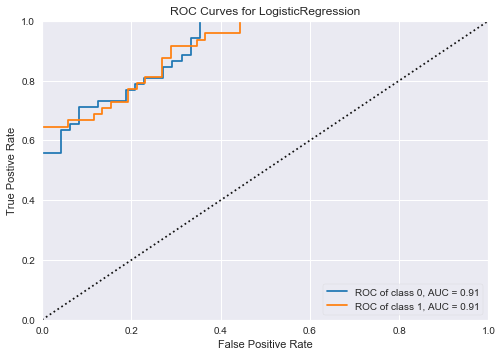

In [52]:
rocauc2 = ROCAUC(LogisticRegression(solver='liblinear'), macro=False, micro=False)
rocauc2.fit(X_train_overlap, y_train_overlap)
rocauc2.score(X_test_overlap, y_test_overlap)
g = rocauc2.poof()

# Other Scoring metrics

There are a number of different scoring metrics that can be used in many different situations. Those available in sklearn can be read about [here](https://scikit-learn.org/stable/modules/classes.html)

# Looking at 2D data - 2 features

The following code creates some artificial blob data using the `make_blobs` function in sklearn. By default - these blobs are created as circles, but a transformation matrix is being used to change their shape. Don't worry if you are not familiar with the linear algebra involved here.

In [53]:
from sklearn.datasets import make_blobs

In [54]:
np.random.seed(123)
X, y = make_blobs(n_samples=300, n_features=2, centers=((1, 1), (5, 5)), cluster_std=1)

In [55]:
trm = np.array([[1, -2], [-2, 1]])
X = X @ trm

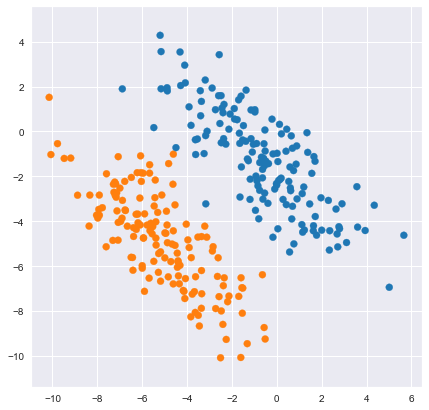

In [56]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0], X[:, 1], c=cmap(y))
ax.axis('equal');

In [57]:
log_reg2d = LogisticRegression(solver='liblinear')

## Plotting the predictions

When visualising 2D data - there is a really nice function in the [mlxtend](http://rasbt.github.io/mlxtend/) library called `plot_decision_regions`, which shows the area of coverage of the models.

One of the inputs to this function needs to be a fitted model.

This library is written by [Sebastian Raschka](https://sebastianraschka.com/), who has written a number of books on Python machine learning that you should definitely check out at some point!

In [58]:
from mlxtend.plotting import plot_decision_regions

In [59]:
log_reg2d.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

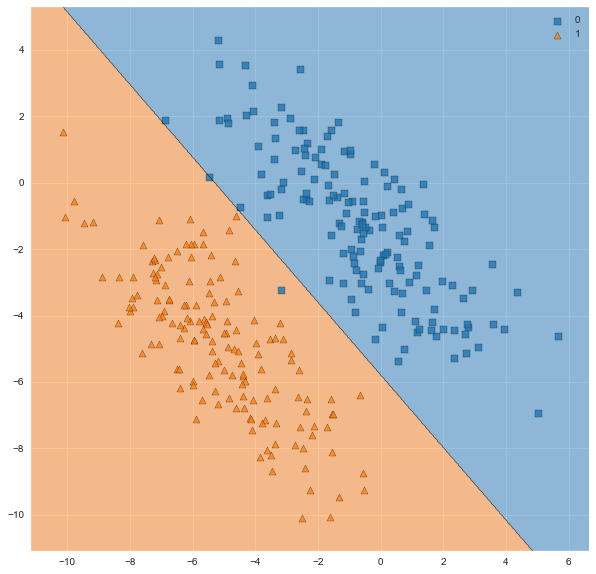

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_regions(X, y, log_reg2d, ax=ax);

# Using a Support Vector Machine

We will now look at a different algorithm called the Support Vector Machine or SVM. We are using this, as this can now move beyond any problems that are linearly separable.

An SVM works as a 'maximum margin classifier' - meaning that the separating line  is chosen so that there is the maximum amount of perpendicular space between the different classes.

In [61]:
from sklearn.svm import SVC

In [62]:
X, y = make_blobs(n_samples=300, n_features=2, centers=((1, 1), (5, 5)), cluster_std=0.6, random_state=9)
X = X @ trm

In [63]:
svm_blobs = SVC(kernel='linear')

In [64]:
svm_blobs.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

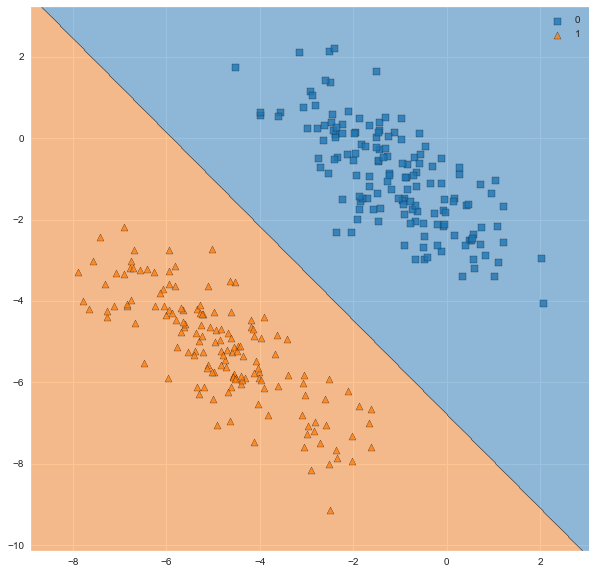

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_regions(X, y, svm_blobs, ax=ax);

# Non linear problems

In the next example - we will look at a problem that cannot be solved with a straight dividing line. We can see that there is a clear circular pattern, but a linear algorithm cannot work this out. This is an example of ___interaction___ within features. The information about the outcome is not depending on a _linear combination_ of the feature _main-effects_ by themselves. The input value of a feature at a certain value is dependent on the value of another feature at any point.

One way of solving this is to use __feature engineering__, we can create a feature of the Euclidean distance, and enter that into the model.

Another way is to use a __kernel method__ in the SVM.

In [66]:
from sklearn.datasets import make_circles

In [67]:
X, y = make_circles(n_samples=500, noise=0.02, factor=0.6, random_state=987)

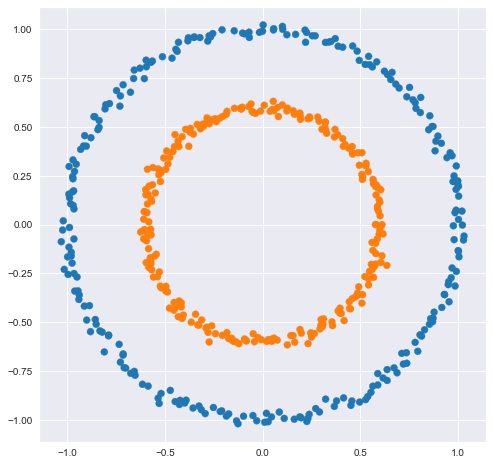

In [68]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=cmap(y))
ax.axis('equal');

### This next cell shows that pandas dataframes can be entered into scikit learn as well as numpy arrays

In [69]:
circle_df = pd.DataFrame(data=X, columns=['x1', 'x2'])
circle_df['squared'] = np.sqrt(circle_df['x1']**2 + circle_df['x2']**2)

In [70]:
circle_df.head()

,x1,x2,squared
0,0.321042,0.931911,0.985660
1,-0.788407,-0.568972,0.972273
2,0.526798,-0.895163,1.038669
3,-0.454613,-0.438060,0.631324
4,0.219501,0.932686,0.958166


#### We are still using a linear algorithm here

In [71]:
svm_circle = SVC(kernel='linear')

In [72]:
svm_circle.fit(circle_df, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [73]:
y_linear_pred = svm_circle.predict(circle_df)

### This shows that the predictions using this new feature are 100% correct

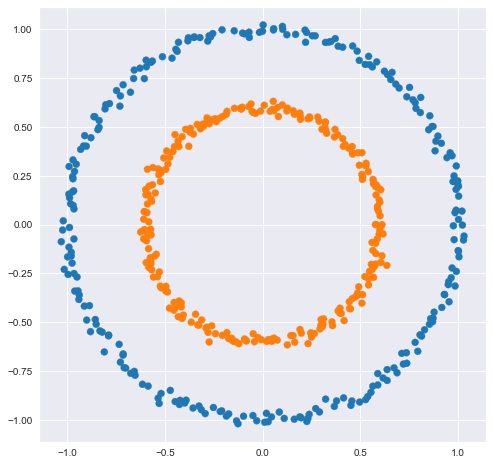

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=cmap(y_linear_pred))
ax.axis('equal');

## Using a Radial Basis Function Kernel

This shows the real power of using a Support Vector Machine. In short, it allows for non-linear classification. Imagine that a new, third, dimension has been added, and now the centre of the circle is coming out of the screen towards you. Now imagine that the circle boundary is like a contour on a map, and that becomes our new decision boundary.

Note that we are specifying one of the arguments when creating the instance, as the latest version of scikit-learn provides a warning otherwise. This will be explained later.

In [75]:
svm_rbf = SVC(kernel='rbf', gamma='auto')

In [76]:
svm_rbf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

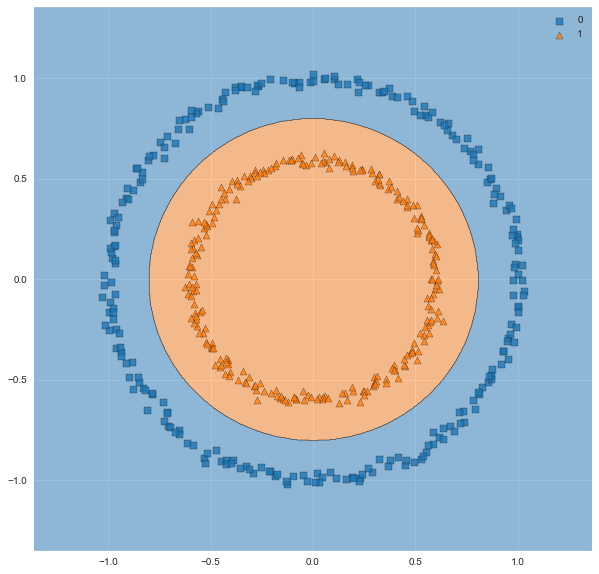

In [77]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_regions(X, y, svm_rbf, ax=ax, zoom_factor=3);

# Hyper-parameters

When building machine learning models, there are a number of different settings that change how the algorithm behaves. This really becomes the soul of machine learning - and when people talk of 'training' the models - what is meant is finding the best hyperparameters possible.

## Notes on an SVM

An SVM can deal with overlapping problems - but in different ways:

* It wants to get as much as possible in the training set correct
    * But this can pick up signal in any noise present
* It allows for more mistakes in the training set
    * But can hopefully result in better generalisation to new data
    
* In an SVM - it is the data points close to the borders that have the influence - these are the __Support Vectors__
    * The hyperparameter ___gamma___ specifies the sphere of influence of the support vectors
        * The __Larger__ this value - the __less__ of an influence it has - this can result in more specific boundaries, but can pick up on noise
            * This is a __High Variance__ model
        * In the opposite situation - there is more generalisation - but there is the risk of not picking up relevant signal
            * This is a __High Bias__ model
    * The hyperparameter ___C___ specifies how much focus the model should put on getting the training set correct
    
#### Conceptual understanding of the 2 hyperparameters

* Think of _gamma_ as deciding how specific the border between classes is
* Think of _C_ as how strict this border has to be adhered to

## An example of general vs over-fitted model

The next few cells will show the difference between a model that clearly generalises well, vs a model that is clearly too specific.

We are making the overfitted model by specifying high values for both _gamma_ and _C_

__Note__: For this example, the focus is on how the decision plane is made, so no splitting into training and test is made here

In [78]:
from sklearn.datasets import make_moons

In [79]:
X_moons, y_moons = make_moons(n_samples=500, noise=0.2, random_state=27)

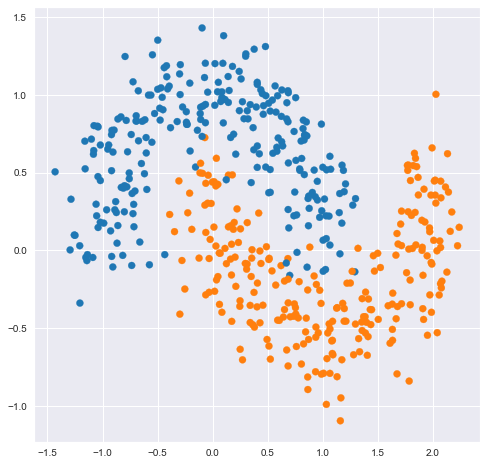

In [80]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X_moons[:, 0], X_moons[:, 1], c=cmap(y_moons));

In [81]:
svm_moons_1 = SVC(C=1, gamma='scale')

In [82]:
svm_moons_1.fit(X_moons, y_moons)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

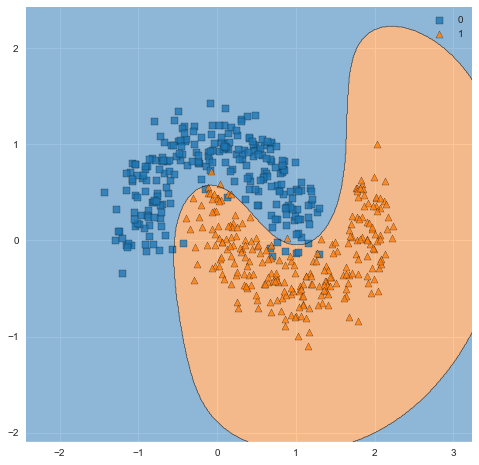

In [83]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_decision_regions(X_moons, y_moons, svm_moons_1, ax=ax);

In [84]:
svm_moons_100 = SVC(C=100, gamma=100)

In [85]:
svm_moons_100.fit(X_moons, y_moons)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Overfitted decision regions

Note how this model has placed far too much importance on the data used to train the model. It has even isolated little islands within each respective area.

This model is not suitable for applying to new data points at all.

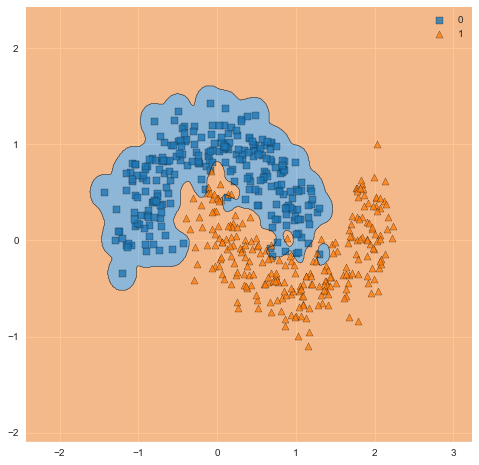

In [86]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_decision_regions(X_moons, y_moons, svm_moons_100, ax=ax);

# A word of caution when interpretting models!

Note the following property of the better moon model that we created. If we zoom out enough, we can see that a great deal of the input space is classified as blue/0. However, if we were to get any new data in this region, this might not be the case.

In short, we should always be cautious of any classification of new data that is vastly different from the data used to train the model.

__Don't just build models and then chuck in data expecting everything to be ok!__.

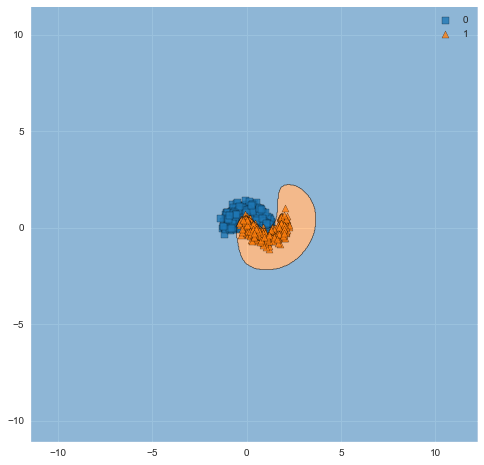

In [87]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_decision_regions(X_moons, y_moons, svm_moons_1, zoom_factor=0.1);

## Cross Validation to find the correct hyper-parameters

This really is the whole crux of making machine learning models. If we have the correct model, and the correct hyper-parameter settings for every task, then we would all be millionaires from winning [Kaggle](https://www.kaggle.com/) competitions!

This is another example of a __vast__ field of ongoing research. Here we will use a `GridSearch`. This works by carrying out a _brute-force/exhaustive_ search of all possibilities you have stated. The clear disadvantage of this is that it can be __slow__! But it is a clear first example, that is easy to understand. There is active research and development on techniques that look to intelligently search through the hyper-parameter space. One such example is the [Hyperopt-sklearn](http://hyperopt.github.io/hyperopt-sklearn/) library - but that cannot be covered here.

### Setting out the search space

For this example, we will search through values of _C_ and _gamma_, for both the linear and rbf kernels. (Note that _gamma_ is not actually used in a linear kernel). We are using the `logspace` function from `numpy` to get a wide range of values.

In [88]:
C_values = np.logspace(-1, 3, 5)
C_values

array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [89]:
gamma_values = np.logspace(-2, 2, 5)
gamma_values

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [90]:
kernel_values = ['linear', 'rbf']

#### Number of combinations

These setting alone give 50 different combinations that will all be used!

In [91]:
from sklearn.model_selection import GridSearchCV

We pass in the parameter options in a dictionary

In [92]:
parameters = {'kernel': kernel_values, 'C': C_values, 'gamma': gamma_values}

Setting up the model that will be used - the random state is used to aid in reproducibility for the workshop!

In [93]:
agnostic_svc = SVC(random_state=12)

## A note on the arguments used

* `estimator`: A scikit-learn model instance
* `param_grid`: The dictionary of parameters that we made
* `scoring`: Defines how the model will be judged - refer to the documentation for more information
* `cv`: How the data will be split into training and test
    * This can get complicated!
    * An integer value dictates __K-Fold Stratified Cross Validation__
        * The data is split into K-parts - each containing the same ratio of classes
        * The data is trained and tested __K__ times, which each part getting to be the test set once
        * The aggregated score for the __K__ splits is used to judge that particular set of parameters
* `n_jobs`: State if you want parallel processing
    * This can help with speeding the process up, if you have multi-core processor (you probably do unless you're still running Windows XP)
    * A value of `-1` just means __USE EVERYTHING__
    * This can only work on a single machine - it won't magically work on a Hadoop cluster :(

In [94]:
clf = GridSearchCV(estimator=agnostic_svc, param_grid=parameters, scoring='roc_auc', cv=4, n_jobs=-1)

In [95]:
%%time
clf.fit(X_moons, y_moons)

Wall time: 3.1 s


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=12, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

## Recovering the best score - together with the best parameters

Note - after doing all of this - you don't need to make a new model with these parameters to predict new data - just use what you have built - in this case the `clf` object.

In [96]:
clf.best_score_

0.9979590373783923

In [97]:
clf.best_params_

{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}

# Building a Pipeline

This is another important aspect of machine learning, especially if your data is not ready for putting into the model in its raw state.

In a Support Vector Machine - we want all of the features in the data to have similar ranges, ie... you want the variance to be similar. Some models are not as sensitive to this, like Random Forests.

To show this, we will alter one of the features by making it proportionally much smaller. It can be seen that this has a poor outcome on performance

In [98]:
X_moons_small = deepcopy(X_moons)
X_moons_small[:, 1] *= 1e-6

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_moons_small, y_moons)

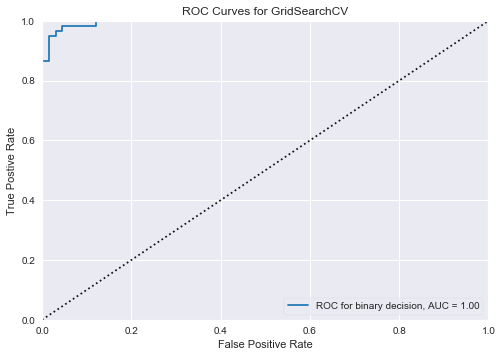

In [100]:
roc_moons = ROCAUC(clf, micro=False, macro=False, per_class=False)
roc_moons.fit(X_train, y_train)
roc_moons.score(X_test, y_test)
roc_moons.poof()

c:\users\timvi\miniconda3\envs\sklearn_workshop\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


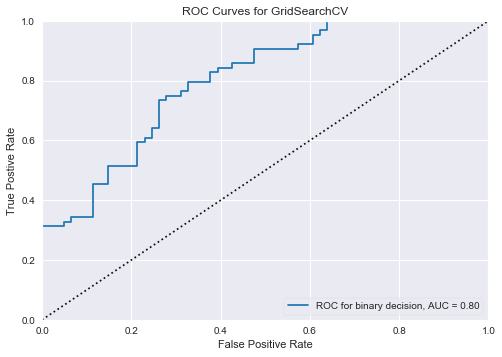

In [101]:
roc_moons = ROCAUC(clf, micro=False, macro=False, per_class=False)
roc_moons.fit(X_train_small, y_train_small)
roc_moons.score(X_test_small, y_test_small)
roc_moons.poof()

# Solving this - add a normalisation preprocessing step to the model

This has the effect of assurring that every feature entered into the training model has the same variance

2 main methods:

* __Normalisation__:
    * Ensuring that the values fit between a range of 0 and 1
* __Standardisation__:
    * Get the _z-score_ of each data point by using the mean and standard-deviation
    * This is the one that will be shown here - using `StandardScaler` function from the `preprocessing` sub-module

## Avoid giving the data extra information!

A __very__ important thing to remember is that the test data should not receive ___any___ information on what is done with the training

When we want to standardise, we should get the mean and standard-deviation from ___the training data only___, and then apply this to the test data.

__This is also the case with every K-Fold iteration in the Cross Validation procedures!!__

While this might sound like a nightmare to implement, it's not - the sklearn developers have thought of it in advance for us!

## Getting the relevant imports

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#### First we need to outline the steps that we want to carry out using a list of tuples

Note that we pass in an _instance_ of the class - either assigned to variables or by creating them in the tuples using `()`

The tuples work as follows:

* Name of stage - provided as a string
* The instance of the object carrying out the stage

In [103]:
scaler_stage = StandardScaler()
svc_stage = SVC()

pipeline_steps = [('scaler', scaler_stage), ('svc', svc_stage)]

# The following also works
# pipeline_steps = [('scaler', StandardScaler()), ('svc', SVC())]

#### We then use this to create the pipeline - this is now the model

In [104]:
pipeline_model = Pipeline(pipeline_steps)

## `GridSearch` with a pipeline

The general process works the same - we need to ensure that the grid search know which stage of the pipeline the grid values are referring to.

Here is where we use the name of the stage passed into the tuples.

Note that here, we are only doing a grid search for the SVC hyper-parameters. The scaling does not require any.

__Really note the use of the double underscore here!!! Following by the exact name of the parameter__. We will also use the same grid values that we used earlier.

In [105]:
pipeline_grid_params = {'svc__C': C_values, 'svc__gamma': gamma_values}

#### Now we use the `GridSearch` is exactly the same way

In [106]:
pipeline_grid = GridSearchCV(pipeline_model, pipeline_grid_params, cv=4, n_jobs=-1, scoring='roc_auc')
pipeline_grid.fit(X_train_small, y_train_small)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                

## Looking at the best score and parameters

Here we can immediately see that the performance during the cross validation procedure

In [107]:
pipeline_grid.best_score_

0.9962441669236305

In [108]:
pipeline_grid.best_params_

{'svc__C': 1000.0, 'svc__gamma': 0.1}

## How does it perform on the test dataset

Note that this can now take the unscaled input directly

Spoiler - it's brilliant!

In [109]:
X_test_small[:10, :]

array([[ 1.86699147e+00,  3.55962650e-07],
       [ 1.68268453e+00,  4.09065089e-08],
       [-2.09466238e-01,  3.67526601e-07],
       [ 5.41726219e-01,  9.65779024e-07],
       [ 3.40151414e-01, -3.53400183e-07],
       [-1.05340882e+00,  2.22141922e-07],
       [-5.82825023e-01,  9.97586415e-07],
       [ 1.89167134e-02,  9.32035667e-07],
       [ 8.31693508e-01,  4.86819373e-07],
       [-9.62625852e-01,  2.60720180e-07]])

Note that there is some rounding in the graph label here

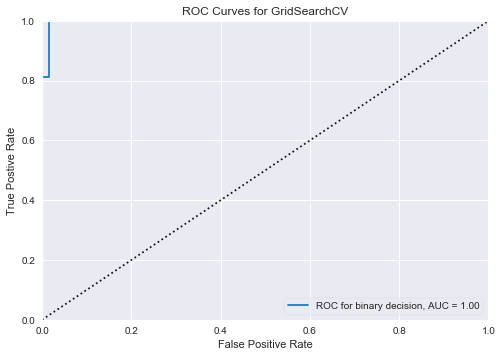

In [110]:
pipeline_roc = ROCAUC(pipeline_grid, micro=False, macro=False, per_class=False)
pipeline_roc.fit(X_train_small, y_train_small)
pipeline_roc.score(X_test_small, y_test_small)
pipeline_roc.poof()

# Using ROC without YellowBrick

We can get this score from sklearn directly. But we __need__ to provide the score how sure we are of each data point in the test set.

Remember for the `LogisticRegression`, we used `predict_proba`. In an SVM, we can use the `decision_function` function instead of `predict`.

You will have to look at the documentation to find out what's needed (if possible) for each model you are using!

In [111]:
y_pred_small = pipeline_grid.decision_function(X_test_small)

In [112]:
from sklearn.metrics import roc_auc_score

For this - we pass in the true values first, then the predicted value

In [113]:
roc_auc_score(y_test_small, y_pred_small)

0.9969262295081966

# Larger worked example using a Random Forest - with interpretation of input features

For the last example, we will look at using a larger dataset for a slightly more complicated task. For this, we will look at the wine quality dataset that is included in scikit-learn. This consists of the following:

* 13 numeric features - all with different variances and ranges
* 3 output classes for classification

## Random Forests

Random Forests are an example of an __Ensemble__ training method. The main idea is that it is a collection of different decision trees, that are all used to tackle a problem. A very brief and simplistic explanation is provided below.

A decision tree looks to search through patterns of data in various features, and tries to find aspects of the data that most explain the differences between the classes. It then builds a series of _binary_ splits through the data. You follow the splits, based on different values in the data, until reaching a class label for a particular dataset. However, decision trees can be very prone to overfitting. To get around this, _several_ decision trees are built, but each one is only given a subset of the features. This means that each tree has to do its best, with limited information.

When each decision tree is built - their _collective_ vote decides the class of each new sample. They are therefore referred to as __Ensembles of weak classifiers__.

Some points to note about Random Forests:

* There are many hyper-parameters that can be used and adjusted
* They are ___invariant___ to feature scaling:
    * This means that, unlike the Support Vector Machines, they are not sensitive to different ranges in the data.
    * This is because they look at the information contained in each feature individually - the interaction comes from the collective vote of the decision trees.
* They can provide a summary of how much each feature was used when making the final decision
    * This can aid in interpretability of the results

In [114]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier

## Loading in the data, and getting information about it:

In [115]:
all_wine_data = load_wine()
print(all_wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [116]:
wine_input_data = all_wine_data['data']
wine_targets = all_wine_data['target']

In [117]:
wine_input_data.shape

(178, 13)

In [118]:
wine_targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Setting values for some of the hyper-parameters

Take special care with the following parameters, as they can cause each decision tree to be very large:

* `max_depth`: The number of splits that can be made - if left at default, the splits will continue as much as possible!
* `min_samples_split`: The number of samples whose information is needed for a split. The default is 2 and means that splits can be made for every pair in the dataset!

Fortunately - this dataset is not all that large

In [119]:
wine_train, wine_test, target_train, target_test = train_test_split(wine_input_data, wine_targets, test_size=0.15)

In [120]:
rf = RandomForestClassifier(n_estimators=10, random_state=12, n_jobs=-1)

In [122]:
rf.fit(wine_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [123]:
y_pred = rf.predict(wine_test)

# Results

So at this point, I was hoping to see some errors that needed to be improved in order to show some cross validation - but the Random Forest totally crushed it!

The following image might help with this:

![title](images/precision_recall.png)

Another very useful piece in the scikit-learn toolbox is the `classification_report`. This shows the following pieces of information:

* __Precision__: Suffers from too many false positives
* __Recall__: Suffers from too many false negatives
* __F1 Score__:

![title](images/f1_score.png)

In [124]:
from sklearn.metrics import classification_report

In [125]:
print(classification_report(target_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        10

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



#### Showing that indeed, every prediction is correct

In [126]:
y_pred

array([2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 2, 2])

In [127]:
target_test

array([2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 2, 2])

# Looking at feature importances

As mentioned earlier - a feature of Random Forests is that they are able to provide information about the features that they used the most when making their decisions.

This can be seen in the following cells, where I have put the results into a Pandas dataframe in order to make the results clearer.

In [128]:
rf.feature_importances_

array([0.12516344, 0.06427143, 0.03622958, 0.04577419, 0.02087505,
       0.00481713, 0.26707376, 0.00104876, 0.00957958, 0.20944326,
       0.02202406, 0.07688045, 0.11681931])

In [129]:
summary_dataset = pd.DataFrame(
    dict(
        names=all_wine_data.feature_names,
        importance=rf.feature_importances_
    )
)

In [130]:
summary_dataset.sort_values('importance', ascending=False)

,names,importance
6,flavanoids,0.267074
9,color_intensity,0.209443
0,alcohol,0.125163
12,proline,0.116819
11,od280/od315_of_diluted_wines,0.076880
1,malic_acid,0.064271
3,alcalinity_of_ash,0.045774
2,ash,0.036230
10,hue,0.022024
4,magnesium,0.020875


## Permutation Importance

Another method of looking at the importance of features is to use permutations. This also works on more _black-box_ algorithms like the SVM.

In the cases below, the test set is run several times - but with the values for a feature shuffled each time. The main idea being: if the shuffling does not have much of an effect on an outcome - then it probably was not important - __BUT__ if it does affect the scoring, then we can assume that it is important, and is carrying vital information to the outcome of the prediction of each datapoint.

Here we can use the [eli5](https://eli5.readthedocs.io/en/latest/index.html) (explain it like I'm 5) library to carry this out - note that we can use the different scoring methods that we have spoken about!

In [131]:
import eli5
from eli5.sklearn import PermutationImportance

In [132]:
perm = PermutationImportance(rf).fit(wine_test, target_test, scoring='f1')
eli5.show_weights(perm)

Weight,Feature
0.2667 ± 0.1089,x6
0.0519 ± 0.0363,x10
0.0370 ± 0.0000,x11
0.0370 ± 0.0468,x9
0.0296 ± 0.0296,x5
0.0222 ± 0.0363,x1
0.0148 ± 0.0363,x12
0.0074 ± 0.0296,x3
0.0074 ± 0.0296,x0
0 ± 0.0000,x8


In [133]:
perm = PermutationImportance(rf).fit(wine_test, target_test, scoring='precision')
eli5.show_weights(perm)

Weight,Feature
0.2593 ± 0.0663,x6
0.0444 ± 0.0296,x10
0.0444 ± 0.0554,x9
0.0296 ± 0.0296,x5
0.0222 ± 0.0363,x1
0.0148 ± 0.0363,x12
0.0148 ± 0.0363,x3
0.0074 ± 0.0296,x11
0 ± 0.0000,x8
0 ± 0.0000,x7


In [134]:
perm = PermutationImportance(rf).fit(wine_test, target_test, scoring='recall')
eli5.show_weights(perm)

Weight,Feature
0.3259 ± 0.1511,x6
0.0519 ± 0.0363,x10
0.0296 ± 0.0296,x11
0.0296 ± 0.0296,x3
0.0296 ± 0.0296,x1
0.0148 ± 0.0363,x9
0.0148 ± 0.0363,x5
0.0148 ± 0.0363,x0
0.0074 ± 0.0296,x12
0 ± 0.0000,x8


In [135]:
perm = PermutationImportance(rf).fit(wine_test, target_test, scoring='accuracy')
eli5.show_weights(perm)

Weight,Feature
0.3407 ± 0.1274,x6
0.0519 ± 0.0363,x10
0.0519 ± 0.0889,x9
0.0296 ± 0.0296,x5
0.0222 ± 0.0363,x0
0.0148 ± 0.0363,x12
0.0148 ± 0.0363,x3
0.0074 ± 0.0296,x11
0.0074 ± 0.0296,x4
0.0074 ± 0.0296,x1
